In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df_1 = pd.read_csv('train_cap_2.csv')

<AxesSubplot:>

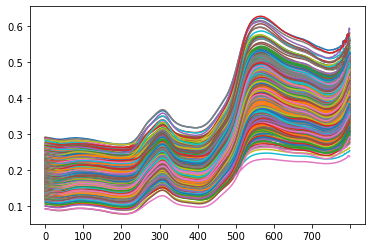

In [13]:
df_1.drop(columns = ['Cap']).T.plot(legend = False)

In [15]:
%run Functions_2911.py

<AxesSubplot:>

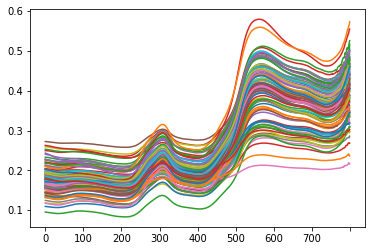

In [70]:
df_2 = pd.read_csv('test_cap.csv')
df_2.drop(columns = ['Cap']).T.plot(legend = False)

In [132]:
df_1_arr = np.array(df_1.drop(columns = ['Cap']))

In [133]:
df_1_arr.shape

(637, 800)

In [134]:
x_t = savitzky(df_1_arr,11,2)
x_t = MSC(x_t)
x_t = detrending(x_t)
x_df_1 = derivate_first(x_t,11,2)

In [135]:
df_2_arr = np.array(df_2.drop(columns = ['Cap']))
x_t = savitzky(df_2_arr,11,2)
x_t = MSC(x_t)
x_t = detrending(x_t)
x_df_2 = derivate_first(x_t,11,2)

In [71]:
df_comb = pd.concat([df_1,df_2])

In [72]:
df_comb.shape

(732, 801)

<AxesSubplot:>

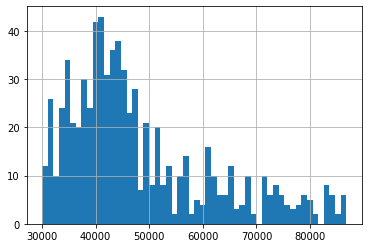

In [74]:
df_comb.Cap.hist(bins = 54)

In [ ]:
df_comb_2 = 

In [92]:
df_um = pd.read_csv('UW_chili.csv')

In [93]:
df_um_2 = df_um.query('Cap>=30000 & Cap<=90000')

<AxesSubplot:>

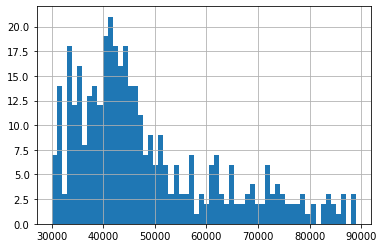

In [94]:
df_um_2.Cap.hist(bins = 60)

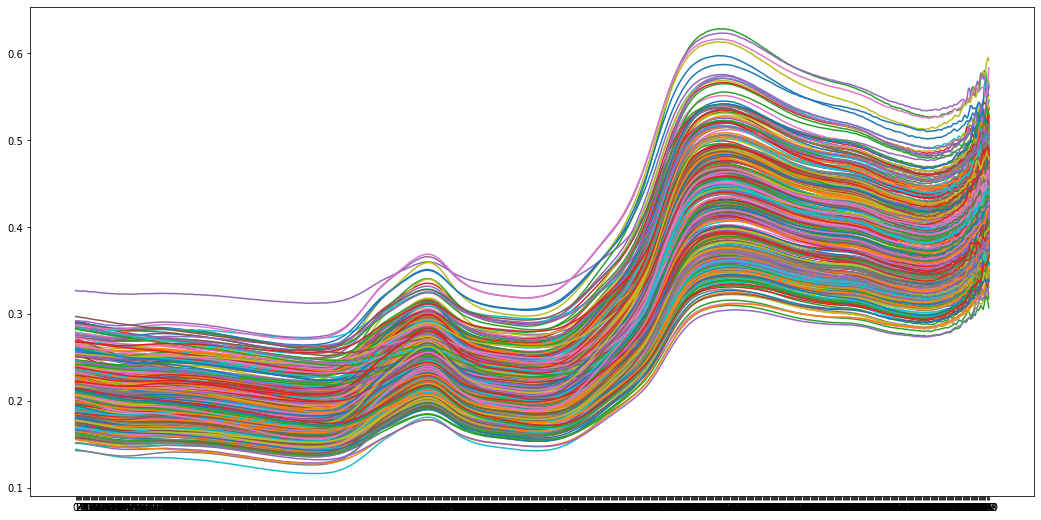

In [162]:
plt.figure(figsize=(18,9))
plt.plot(df_um_2.iloc[:,0:800].T)
plt.show()

In [95]:
df_rm = pd.read_csv('RM_chili.csv')
df_rm_2 = df_rm.query('Cap>=30000 & Cap<=90000')

<AxesSubplot:>

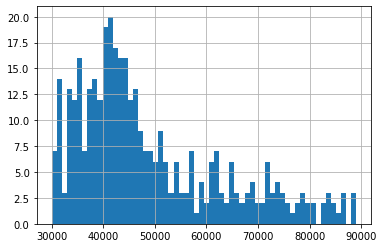

In [96]:
df_rm_2.Cap.hist(bins = 60)

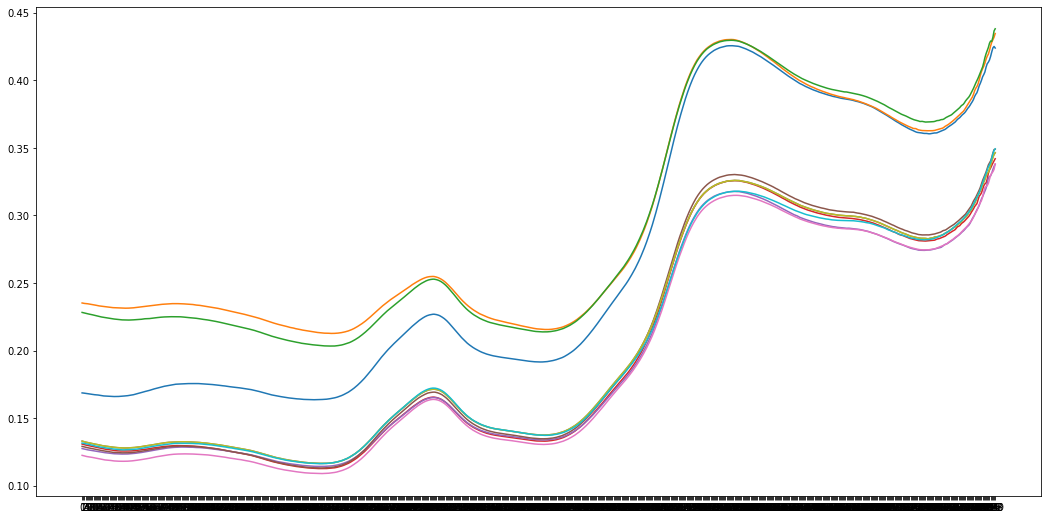

In [183]:
plt.figure(figsize=(18,9))
plt.plot(df_rm_2.iloc[120:130,0:800].T)
plt.show()

In [97]:
df_comb_d_1 = pd.concat([df_rm_2,df_um_2])

<AxesSubplot:>

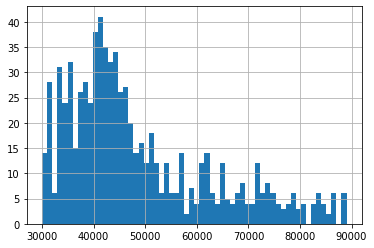

In [98]:
df_comb_d_1.Cap.hist(bins=60)

In [99]:
df_rm_2_uf = uniform_selection(df_rm_2,1000,'Cap',10)

<AxesSubplot:>

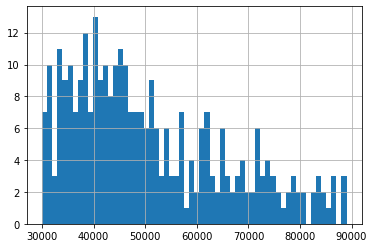

In [100]:
df_rm_2_uf.Cap.hist(bins=60)

In [102]:
df_um_2_uf = uniform_selection(df_um_2,1000,'Cap',10)

<AxesSubplot:>

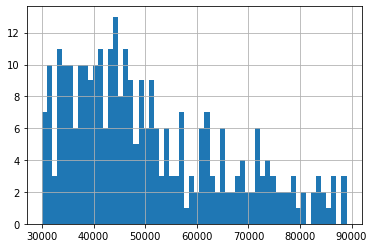

In [103]:
df_um_2_uf.Cap.hist(bins=60)

In [104]:
df_comb_uf_1 = pd.concat([df_rm_2_uf,df_um_2_uf])

<AxesSubplot:>

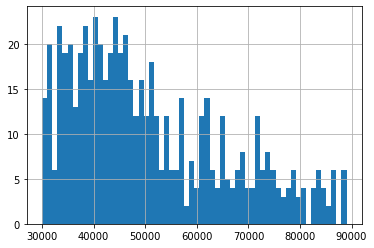

In [105]:
df_comb_uf_1.Cap.hist(bins = 60)

In [106]:
df_comb_uf_1.shape

(618, 805)

In [107]:
df_comb_d_1.shape

(773, 805)

In [108]:
df_comb_uf_1.head()

,0,1,2,3,4,5,6,7,8,9,...,795,796,797,798,799,800,Sample ID,Device ID,Cap,ASTA
58,0.178158,0.178013,0.177849,0.177680,0.177519,0.177378,0.177253,0.177138,0.177025,0.176909,...,0.492370,0.495787,0.498476,0.500730,0.503871,0.506467,CH2100064812,RM5NT9FN,30098,76.80
109,0.121707,0.121504,0.121312,0.121124,0.120932,0.120730,0.120518,0.120300,0.120081,0.119868,...,0.312532,0.314594,0.316079,0.317954,0.321947,0.325140,CH2100067980,RM5NT9FN,30029,NaN
140,0.243415,0.243219,0.243060,0.242922,0.242779,0.242615,0.242427,0.242223,0.242010,0.241794,...,0.515880,0.517680,0.520515,0.523982,0.526264,0.527808,CH2100066915,RM5NT9FN,30687,77.91
159,0.130842,0.130601,0.130374,0.130166,0.129980,0.129818,0.129663,0.129494,0.129292,0.129062,...,0.335140,0.337043,0.338826,0.340352,0.341996,0.344056,CH2100068095,RM5NT9FN,30990,NaN
253,0.171864,0.171701,0.171542,0.171369,0.171170,0.170952,0.170730,0.170519,0.170328,0.170163,...,0.437550,0.439195,0.439380,0.440744,0.442293,NaN,CH2100068379,RM5NT9FN,30276,104.50


In [109]:
X_train = []
Y_train = []
X_val = []
Y_val = []

In [113]:
r1 = 30_000
seed = 43

In [115]:
y = np.zeros(int((90_000-30_000)/1_000),dtype=np.int32)
labels = df_comb_uf_1['Cap'].values
for label in labels:
    y[int((label-r1)/1_000)]+=1
    
for i in range(len(y)):
    qr = 'Cap>='+str(r1+i*1_000)+' & Cap<'+str(r1+(i+1)*1_000)
    df_combine_ = df_comb_uf_1.query(qr)
    if(y[i]>3):
        df_combine_2 = df_combine_.sample(n=2,random_state = seed)
        df_combine_1 = df_combine_.drop(df_combine_2.index)
        X_train.append(np.array(df_combine_1.drop(columns = ['Cap','Device ID','800','ASTA','Sample ID'])))
        Y_train.append(np.array(df_combine_1['Cap']))
        X_val.append(np.array(df_combine_2.drop(columns = ['Cap','Device ID','800','ASTA','Sample ID'])))
        Y_val.append(np.array(df_combine_2['Cap']))
    else:
        
        X_train.append(np.array(df_combine_.drop(columns = ['Cap','Device ID','800','ASTA','Sample ID'])))
        Y_train.append(np.array(df_combine_['Cap']))
        
X_train = np.vstack(X_train)
Y_train = np.hstack(Y_train)
X_val = np.vstack(X_val)
Y_val = np.hstack(Y_val)

In [116]:
X_train.shape

(518, 800)

In [118]:
X_val.shape

(100, 800)

In [120]:
col = [str(x) for x in range(0,800)]

In [121]:
df_train_uf = pd.DataFrame(X_train,columns = col)
df_train_uf['Cap'] = Y_train

In [122]:
df_test_uf = pd.DataFrame(X_val,columns = col)
df_test_uf['Cap'] = Y_val

<AxesSubplot:>

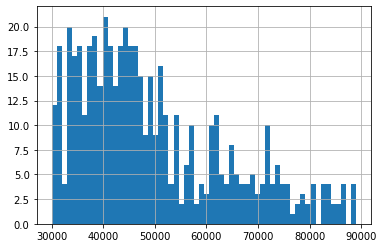

In [123]:
df_train_uf.Cap.hist(bins = 60)

<AxesSubplot:>

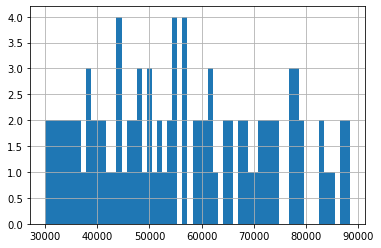

In [124]:
df_test_uf.Cap.hist(bins=60)

In [126]:
df_train_uf.to_csv('train_cap_1k_3.csv',index = False)
df_test_uf.to_csv('test_cap_1k_3.csv',index = False)

trying PLS on the given dataset

In [127]:
from scipy import signal as sg
from scipy.signal import savgol_filter
from scipy.stats import chi2
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import sklearn.metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [129]:
#importing metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#suppress warning messages
import warnings
warnings.filterwarnings('ignore')

import pickle
from sklearn.cross_decomposition import PLSRegression

In [194]:
df_train_uf.head(1)

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,Cap
0,0.178158,0.178013,0.177849,0.17768,0.177519,0.177378,0.177253,0.177138,0.177025,0.176909,...,0.481522,0.485357,0.48809,0.489988,0.49237,0.495787,0.498476,0.50073,0.503871,30098


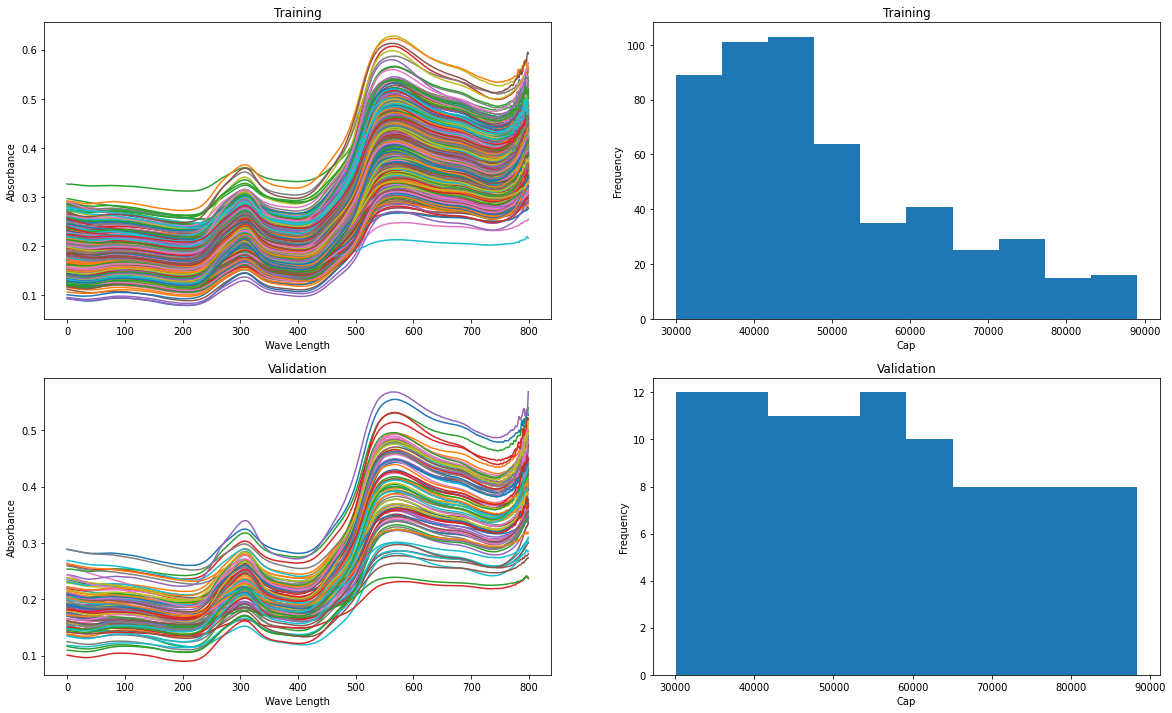

In [130]:
plot_train_test(df_train_uf.drop(columns = ['Cap']),df_test_uf.drop(columns = ['Cap']),df_train_uf.Cap,df_test_uf.Cap,'Cap')

In [341]:
arr_train = np.asarray(df_train_uf.iloc[:,150:-50], dtype = 'float64')
arr_eval = np.asarray(df_test_uf.iloc[:,150:-50], dtype = 'float64')
y_train_arr = np.asarray(df_train_uf.Cap, dtype = 'float64')
y_eval_arr = np.asarray(df_test_uf.Cap, dtype = 'float64')

In [143]:
pre_steps, plot_title = pre_process()

In [144]:
y_train_arr /=16_000
y_eval_arr /=16_000

In [145]:
arr_train.shape

(518, 601)

In [146]:
arr_eval.shape

(100, 601)

In [147]:
begin_time = datetime.datetime.now()
combined_result = pd.DataFrame()
for i in range(15, 25, 2): # range of window length to apply
    for j in range(2, 4, 1): # range of polyorder to apply
        n_comp = 15
        result = trials(pre_steps, plot_title, n_comp, i,j, arr_train, y_train_arr, arr_eval, y_eval_arr)
        combined_result = combined_result.append(result)
end_time = datetime.datetime.now()
time_taken = end_time - begin_time

In [150]:
combined_result.sort_values(['Train MAPE','Train R²'], ascending = [True,False]).head(10)

,Model,Pre Processing,Train R²,Test R²,Train MAPE,Test MAPE,Pre_processing_para,PLS components
12,PLSR,MS->SNV->De-T->SG_2DV->,0.317321,0.555554,0.186890,0.165530,[Window_Length :15 Polyorder :2],15
12,PLSR,MS->SNV->De-T->SG_2DV->,0.317321,0.555554,0.186890,0.165530,[Window_Length :15 Polyorder :3],15
66,PLSR,SG->SNV->Autoscaling->SG_1DV->,0.314607,0.583602,0.187466,0.155850,[Window_Length :17 Polyorder :2],15
39,PLSR,SG->Autoscaling->SG_1DV->,0.314607,0.583602,0.187466,0.155850,[Window_Length :17 Polyorder :2],15
79,PLSR,SG->SNV->SG_1DV->,0.314607,0.583602,0.187466,0.155850,[Window_Length :17 Polyorder :2],15
63,PLSR,SG->MSC->Autoscaling->SG_1DV->,0.314607,0.583602,0.187466,0.155850,[Window_Length :17 Polyorder :2],15
3,PLSR,MS->MSC->De-T->SG_2DV->,0.313622,0.531396,0.187492,0.162279,[Window_Length :15 Polyorder :2],15
3,PLSR,MS->MSC->De-T->SG_2DV->,0.313622,0.531396,0.187492,0.162279,[Window_Length :15 Polyorder :3],15
19,PLSR,MS->SNV->Autoscaling->SG_2DV->,0.314517,0.565247,0.187805,0.162907,[Window_Length :15 Polyorder :2],14
63,PLSR,SG->MSC->Autoscaling->SG_1DV->,0.314673,0.579598,0.187999,0.156000,[Window_Length :19 Polyorder :2],15


In [151]:
combined_result.to_csv("combined_result_cap_train.csv")

In [389]:
train_arr = derivate_second(detrending(snv(moving_smoothing(arr_train,15))),15,2)
eval_arr = derivate_second(detrending(snv(moving_smoothing(arr_eval,15))),15,2)

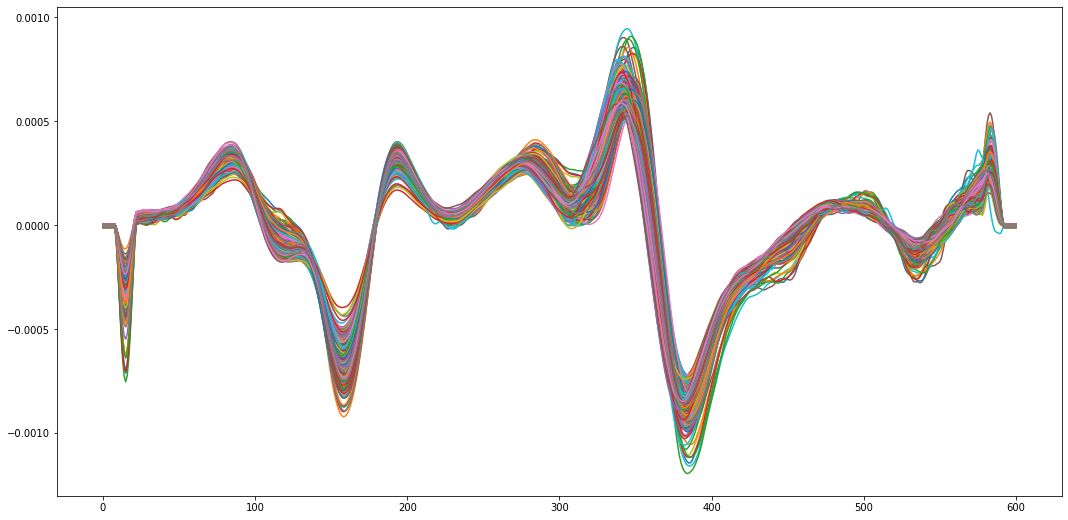

In [159]:
plt.figure(figsize=(18,9))
plt.plot(train_arr.T)
plt.show()

In [235]:
plsr_final = PLSRegression(n_components = 15) #best_number of components 
plsr_final.fit(train_arr, y_train_arr)
train_pred_final = plsr_final.predict(train_arr)
eval_pred_final = plsr_final.predict(eval_arr)
#calculate metrics for both training and validation prediction
r2_train, adj_r2_train, mape_train = metric_cal(y_train_arr*16000, train_pred_final*16000, train_arr.shape[1])
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, eval_pred_final*16000, eval_arr.shape[1])
#metrics
print("Train R2  : %.4f" %r2_train)
print('Train MAPE: %.4f' %mape_train)
print("Valid R2  : %.4f" %r2_valid)
print('Valid MAPE: %.4f' %mape_valid)

Train R2  : 0.7560
Train MAPE: 0.1204
Valid R2  : 0.5556
Valid MAPE: 0.1655


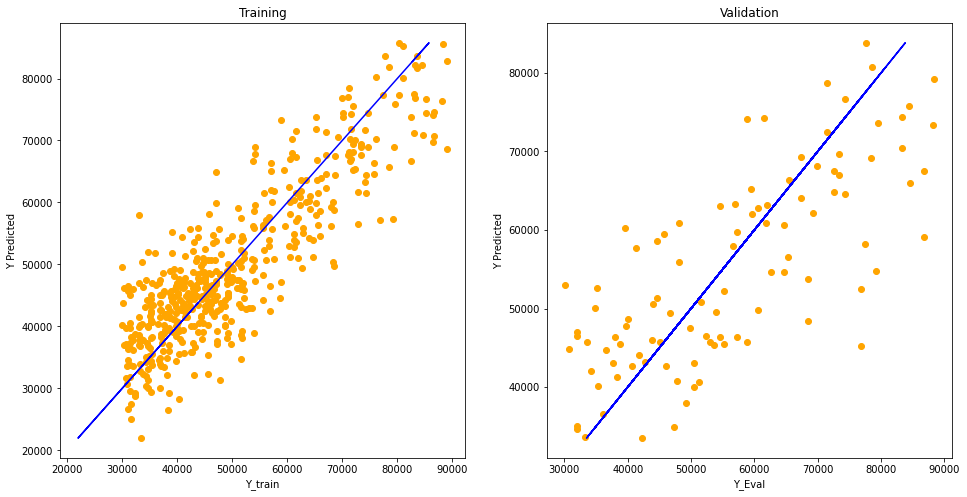

In [189]:
pred_plot(y_train_arr*16000, train_pred_final*16000, y_eval_arr*16000, eval_pred_final*16000, 'Cap')

In [223]:
arr_Xs = derivate_second(detrending(snv(moving_smoothing(df_rm_2_uf.iloc[:,150:-54].values,15))),15,2)
arr_Xt = derivate_second(detrending(snv(moving_smoothing(df_um_2_uf.iloc[:,150:-54].values,15))),15,2)

In [222]:
df_rm_2_uf.iloc[:,150:-54].values

array([[0.18248648, 0.18228015, 0.18207028, ..., 0.42092234, 0.4213252 ,
        0.42177101],
       [0.11370683, 0.11351459, 0.11332134, ..., 0.25856643, 0.25888492,
        0.2592646 ],
       [0.23743541, 0.23720424, 0.23695583, ..., 0.45989038, 0.4599677 ,
        0.4601568 ],
       ...,
       [0.13942325, 0.13919804, 0.13895936, ..., 0.36373221, 0.36404926,
        0.36447333],
       [0.16000199, 0.15976555, 0.15952696, ..., 0.3499809 , 0.35021029,
        0.35053716],
       [0.13317736, 0.13291441, 0.13264095, ..., 0.33932321, 0.33983395,
        0.34067583]])

In [220]:
df_um_2_uf.iloc[:,150:-54].shape

(309, 601)

In [218]:
train_arr.shape

(518, 601)

In [192]:
df_rm_2_uf.head()

,0,1,2,3,4,5,6,7,8,9,...,795,796,797,798,799,800,Sample ID,Device ID,Cap,ASTA
58,0.178158,0.178013,0.177849,0.177680,0.177519,0.177378,0.177253,0.177138,0.177025,0.176909,...,0.492370,0.495787,0.498476,0.500730,0.503871,0.506467,CH2100064812,RM5NT9FN,30098,76.80
109,0.121707,0.121504,0.121312,0.121124,0.120932,0.120730,0.120518,0.120300,0.120081,0.119868,...,0.312532,0.314594,0.316079,0.317954,0.321947,0.325140,CH2100067980,RM5NT9FN,30029,NaN
140,0.243415,0.243219,0.243060,0.242922,0.242779,0.242615,0.242427,0.242223,0.242010,0.241794,...,0.515880,0.517680,0.520515,0.523982,0.526264,0.527808,CH2100066915,RM5NT9FN,30687,77.91
159,0.130842,0.130601,0.130374,0.130166,0.129980,0.129818,0.129663,0.129494,0.129292,0.129062,...,0.335140,0.337043,0.338826,0.340352,0.341996,0.344056,CH2100068095,RM5NT9FN,30990,NaN
253,0.171864,0.171701,0.171542,0.171369,0.171170,0.170952,0.170730,0.170519,0.170328,0.170163,...,0.437550,0.439195,0.439380,0.440744,0.442293,NaN,CH2100068379,RM5NT9FN,30276,104.50


In [193]:
df_um_2_uf.head()

,0,1,2,3,4,5,6,7,8,9,...,795,796,797,798,799,800,Sample ID,Device ID,Cap,ASTA
75,0.230488,0.230478,0.230453,0.230373,0.230202,0.229959,0.229705,0.229502,0.229368,0.229274,...,0.481265,0.487436,0.508361,0.506428,0.492109,0.501936,CH2100064812,UW4382RG,30098,76.80
119,0.179028,0.178892,0.178748,0.178569,0.178337,0.178057,0.177763,0.177486,0.177242,0.177025,...,0.346052,0.349246,0.349032,0.347012,0.346270,0.349985,CH2100067980,UW4382RG,30029,NaN
166,0.288750,0.288631,0.288475,0.288300,0.288120,0.287935,0.287731,0.287494,0.287233,0.286980,...,0.516910,0.527742,0.535610,0.532401,0.526753,0.532708,CH2100066915,UW4382RG,30687,77.91
184,0.176920,0.176762,0.176547,0.176293,0.176017,0.175738,0.175475,0.175249,0.175058,0.174879,...,0.359774,0.355030,0.359836,0.360079,0.357499,0.363332,CH2100068095,UW4382RG,30990,NaN
278,0.208845,0.208780,0.208726,0.208644,0.208496,0.208279,0.208018,0.207740,0.207463,0.207201,...,0.467061,0.475802,0.476484,0.478122,0.483133,0.488502,CH2100068379,UW4382RG,30276,104.50


In [325]:
%run di_pls_func_4.py

In [326]:
import di_pls_model_4 as dipls

In [205]:
y_t = np.array(y_train_arr)
y_t = np.expand_dims(y_t,1)

In [206]:
y_t.shape

(518, 1)

In [207]:
y_eval_arr.shape

(100, 1)

In [224]:
arr_Xs.shape

(309, 601)

In [328]:
lamb = [10**i for i in range(9)]

In [329]:
lamb

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [330]:
mape_best_valid = 100
best_i = 0
for i in lamb:
    m_2 = dipls.model(train_arr,y_t,arr_Xs,arr_Xt,15,1000)
    m_2.fit(i)
    yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = train_arr)
    r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])
    if(mape_valid<=mape_best_valid):
        mape_best_valid = mape_valid
        best_i = i

In [331]:
best_i,mape_best_valid

(1000000, 0.15737196591532804)

In [332]:
m_2 = dipls.model(train_arr,y_t,arr_Xs,arr_Xt,15,1000)
m_2.fit(best_i)
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = eval_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])

In [333]:
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = train_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])

In [334]:
r2_valid, adj_r2_valid, mape_valid

(0.5823771946165083, 0.5781157374187176, 0.15737196591532804)

In [335]:
train_pred_dipls = m_2.predict(train_arr,rescale = train_arr)

In [336]:
r2_train, adj_r2_train, mape_train = metric_cal(y_t, train_pred_dipls[0], y_t.shape[1])

In [337]:
r2_train, adj_r2_train, mape_train

(0.8386356649386542, 0.8383229433590779, 0.09834313652263746)

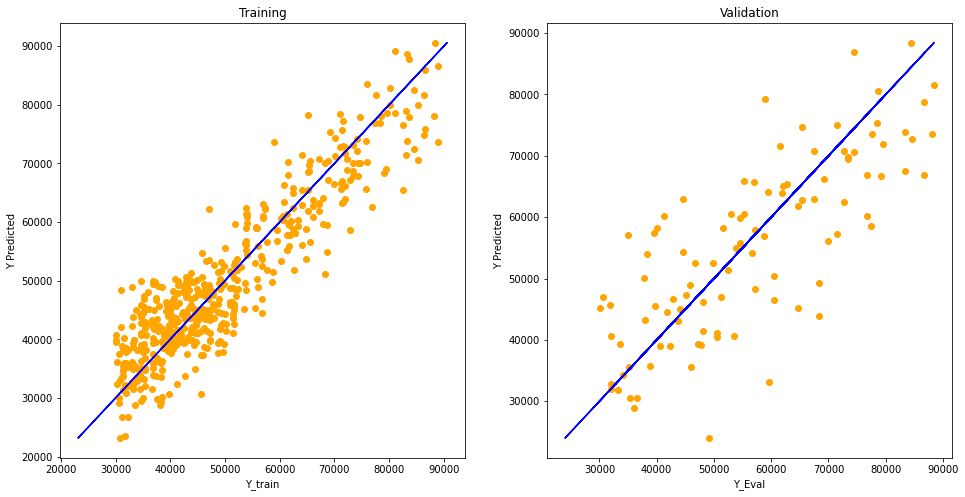

In [338]:
pred_plot(y_train_arr*16000, train_pred_dipls[0]*16000, y_eval_arr*16000, yhat_dipls*16000, 'Cap')

In [339]:
print("Train R2  : %.4f" %r2_train)
print('Train MAPE: %.4f' %mape_train)
print("Valid R2  : %.4f" %r2_valid)
print('Valid MAPE: %.4f' %mape_valid)

Train R2  : 0.8386
Train MAPE: 0.0983
Valid R2  : 0.5824
Valid MAPE: 0.1574


In [340]:
df_dipls_train =pd.DataFrame(arr_train)
df_dipls_test = pd.DataFrame(arr_eval)

In [344]:
df_dipls_train['actual_cap'] = y_train_arr
df_dipls_test['actual_cap'] = y_eval_arr
df_dipls_train['pred_cap'] = train_pred_dipls[0]*16000
df_dipls_test['pred_cap'] = yhat_dipls*16000

In [345]:
df_dipls_train.to_csv('df_dipls_train_1.csv',index = False)
df_dipls_test.to_csv('df_dipls_test_1.csv',index = False)

#### after removing with abs more than 10K

In [346]:
df_train_arr_2 = pd.read_csv('df_dipls_train_1_1.csv')
df_train_arr_2.head()

,0,1,2,3,4,5,6,7,8,9,...,595,596,597,598,599,600,actual_cap,pred_cap,abs,100-MAPE
0,0.139423,0.139198,0.138959,0.138711,0.138456,0.138197,0.137933,0.137664,0.137385,0.137097,...,0.362631,0.362943,0.363339,0.363732,0.364049,0.364473,88154,78168.69717,9985.302835,88.672887
1,0.196675,0.196504,0.196342,0.196179,0.196003,0.195815,0.195629,0.195459,0.195299,0.195133,...,0.304719,0.304973,0.305116,0.305133,0.305258,0.305368,34401,44329.94483,9928.944834,71.137627
2,0.164524,0.164308,0.164057,0.163782,0.163513,0.163271,0.163038,0.162783,0.162495,0.162210,...,0.377404,0.377635,0.377868,0.377910,0.378001,0.378329,56688,46892.10453,9795.895474,82.719631
3,0.182486,0.182280,0.182070,0.181867,0.181661,0.181434,0.181171,0.180889,0.180616,0.180369,...,0.420623,0.420747,0.420790,0.420922,0.421325,0.421771,30098,39866.58489,9768.584885,67.544073
4,0.204234,0.203925,0.203599,0.203264,0.202928,0.202602,0.202295,0.201993,0.201677,0.201338,...,0.498823,0.498870,0.498965,0.499024,0.498985,0.498998,37481,47121.13593,9640.135926,74.279939


In [348]:
arr_train_2 = np.asarray(df_train_arr_2.iloc[:,:-4], dtype = 'float64')
y_train_arr_2 = np.asarray(df_train_arr_2.actual_cap, dtype = 'float64')

In [351]:
y_t_2 = np.array(y_train_arr_2)
y_t_2 = np.expand_dims(y_t_2,1)

In [379]:
y_t_2[0]

array([88154.])

In [352]:
train_arr_2 = derivate_second(detrending(snv(moving_smoothing(arr_train_2,15))),15,2)

In [355]:
y_eval_arr = np.expand_dims(y_eval_arr,1)

In [356]:
y_eval_arr.shape

(100, 1)

In [360]:
mape_best_valid = 100
best_i = 0
for i in lamb:
    m_2 = dipls.model(train_arr_2,y_t_2,arr_Xs,arr_Xt,15,1000)
    m_2.fit(i)
    yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = train_arr_2)
    r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])
    if(mape_valid<=mape_best_valid):
        mape_best_valid = mape_valid
        best_i = i

In [361]:
best_i,mape_best_valid

(1000000, 0.16531819717772278)

In [407]:
y_t_2[22]

array([45776.])

In [408]:
m_2 = dipls.model(train_arr_2,y_t_2/16_000,arr_Xs,arr_Xt,15,1000)
m_2.fit(best_i)

In [409]:
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr/16_000, rescale = train_arr_2)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr, yhat_dipls*16_000, y_eval_arr.shape[1])

In [410]:
r2_valid, adj_r2_valid, mape_valid

(0.558601141094164, 0.554097071105329, 0.16531819717700305)

In [411]:
train_pred_dipls = m_2.predict(train_arr_2,rescale = train_arr_2)

In [412]:
r2_train, adj_r2_train, mape_train = metric_cal(y_t_2, train_pred_dipls[0]*16_000, y_t_2.shape[1])

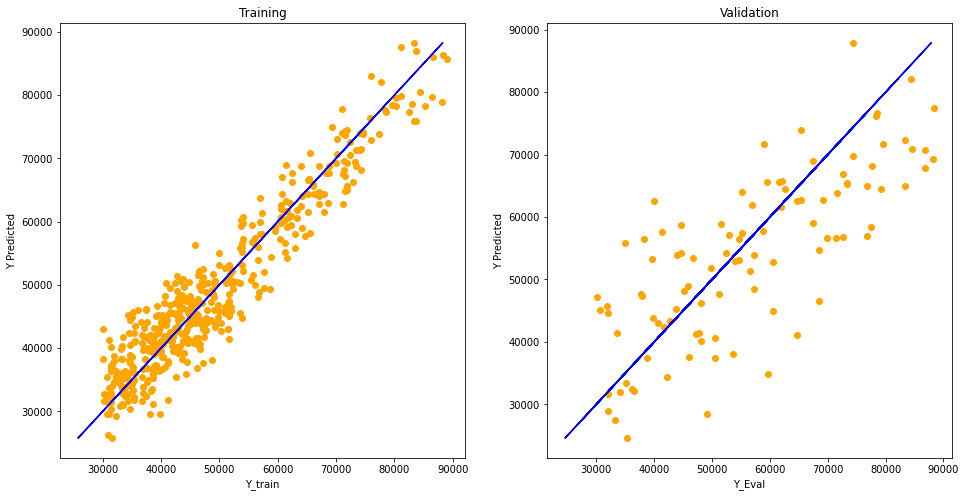

In [415]:
pred_plot(y_train_arr_2, train_pred_dipls[0]*16_000, y_eval_arr, yhat_dipls*16_000, 'Cap')

In [416]:
print("Train R2  : %.4f" %r2_train)
print('Train MAPE: %.4f' %mape_train)
print("Valid R2  : %.4f" %r2_valid)
print('Valid MAPE: %.4f' %mape_valid)

Train R2  : 0.8980
Train MAPE: 0.0780
Valid R2  : 0.5586
Valid MAPE: 0.1653


In [417]:
df_train_pls = pd.DataFrame(columns = ['act','pred'])
df_train_pls['act'] = y_train_arr_2
df_train_pls['pred'] = train_pred_dipls[0]*16_000
df_train_pls.to_csv('some_train_cap_cal.csv')

In [419]:
y_eval_arr.shape

(100, 1)

In [427]:
y_eval_arr[:,0]

array([30687., 30098., 31923., 31956., 32060., 32060., 33226., 33638.,
       34905., 34145., 35088., 35318., 36117., 36583., 37933., 37751.,
       38238., 38822., 39746., 39565., 40034., 40624., 41724., 41328.,
       42767., 42284., 43992., 43759., 44587., 44605., 45776., 45086.,
       46054., 46675., 47774., 47248., 48057., 48057., 49129., 49874.,
       50487., 50487., 51511., 51220., 52978., 52425., 53573., 53900.,
       54637., 54637., 55262., 55262., 56975., 56604., 57247., 57247.,
       58902., 58779., 59602., 59482., 60546., 60527., 61543., 61894.,
       62682., 62036., 64671., 64671., 65323., 65419., 67436., 67436.,
       68421., 68421., 69250., 69934., 71478., 71546., 72646., 72646.,
       73410., 73410., 74388., 74388., 76808., 76808., 77687., 77445.,
       78577., 78411., 79595., 79164., 83358., 83358., 84469., 84585.,
       86768., 86768., 88154., 88358.])

In [428]:
df_test_pls = pd.DataFrame(columns = ['act','pred'])
df_test_pls['act'] = y_eval_arr[:,0]
df_test_pls['pred'] = yhat_dipls*16_000
df_test_pls.to_csv('some_test_cap_cal.csv')

In [399]:
m_2 = dipls.model(train_arr_2,np.log(y_t_2),arr_Xs,arr_Xt,15,1000)
m_2.fit(best_i)

In [401]:
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = np.log(y_eval_arr), rescale = train_arr_2)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr, np.exp(yhat_dipls), y_eval_arr.shape[1])

In [402]:
r2_valid, adj_r2_valid, mape_valid

(0.48896425473336513, 0.48374960427146063, 0.16486410135622293)

In [403]:
train_pred_dipls = m_2.predict(train_arr_2,rescale = train_arr_2)

In [404]:
r2_train, adj_r2_train, mape_train = metric_cal(y_t_2, np.exp(train_pred_dipls[0]), y_t_2.shape[1])

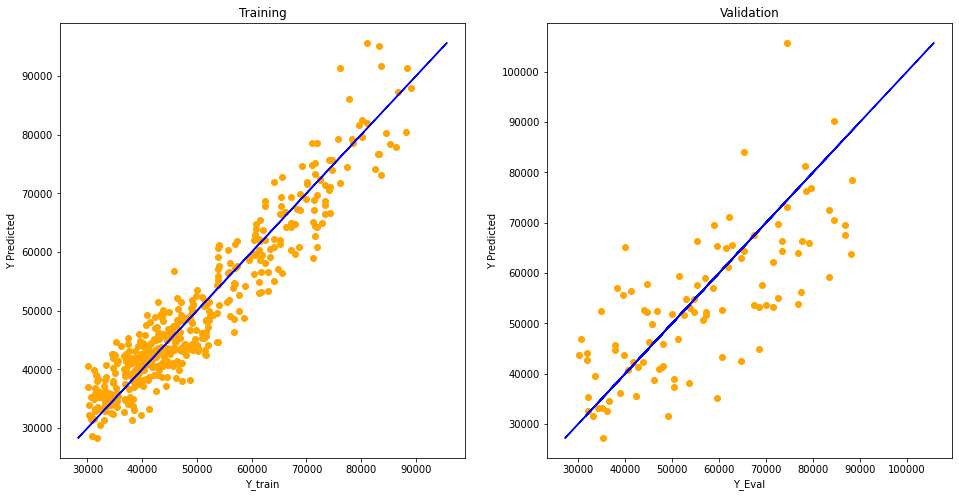

In [405]:
pred_plot(y_train_arr_2, np.exp(train_pred_dipls[0]), y_eval_arr, np.exp(yhat_dipls), 'Cap')

In [406]:
print("Train R2  : %.4f" %r2_train)
print('Train MAPE: %.4f' %mape_train)
print("Valid R2  : %.4f" %r2_valid)
print('Valid MAPE: %.4f' %mape_valid)

Train R2  : 0.8952
Train MAPE: 0.0736
Valid R2  : 0.4890
Valid MAPE: 0.1649


In [ ]:
df_tr_val = pd.DataFrame(columns = ['Actual','Pred'])
df_tr_val['Actual'] = y_train_arr_2*16000
df_tr_val['Pred'] = y
#df_tr_val.to_csv('cap_train_calc.csv')

In [373]:
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = train_arr_2)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])
r2_valid,mape_valid

(0.5586011410912052, 0.16531819717772278)

#### Using Data Augmentation with Di-PLS

In [269]:
def dataaugment(x, betashift = 0.05, slopeshift = 0.05,multishift = 0.05):
    #Shift of baseline
    #calculate arrays
    beta = np.random.random(size=(x.shape[0],1))*2*betashift-betashift
    slope = np.random.random(size=(x.shape[0],1))*2*slopeshift-slopeshift + 1
    #Calculate relative position
    axis = np.array(range(x.shape[1]))/float(x.shape[1])
    #Calculate offset to be added
    offset = slope*(axis) + beta - axis - slope/2. + 0.5

    #Multiplicative
    multi = np.random.random(size=(x.shape[0],1))*2*multishift-multishift + 1

    x = multi*x + offset

    return x

In [271]:
x_t_aug = np.repeat(arr_train,repeats = 9, axis = 0)
shift = .1*np.std(arr_train)
x_t_aug = dataaugment(x_t_aug,betashift = shift,slopeshift = shift/2,multishift = shift)
x_t = np.concatenate((train_arr,x_t_aug),axis = 0)

In [273]:
train_arr_aug = derivate_second(detrending(snv(moving_smoothing(x_t,15))),15,2)

In [275]:
y_train_aug = np.repeat(y_t,repeats = 9,axis = 0)
y_t_aug = np.concatenate((y_t,y_train_aug),axis=0)

In [278]:
y_t_aug.shape, train_arr_aug.shape

((5180, 1), (5180, 601))

In [301]:
eval_arr.shape

(100, 601)

In [307]:
m_2 = dipls.model(train_arr_aug,y_t_aug,arr_Xs,arr_Xt,15,1000)
m_2.fit(1_000_000)

In [308]:
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])

In [309]:
r2_valid, adj_r2_valid, mape_valid

(-4.987141802938415, -5.048235086641868, 0.5865657807073276)

In [310]:
train_pred_dipls = m_2.predict(train_arr,rescale = train_arr)

In [311]:
r2_train, adj_r2_train, mape_train = metric_cal(y_t, train_pred_dipls[0], y_t.shape[1])

In [312]:
r2_train, adj_r2_train, mape_train

(-0.742477347123391, -0.7458542412069635, 0.31543501415079045)

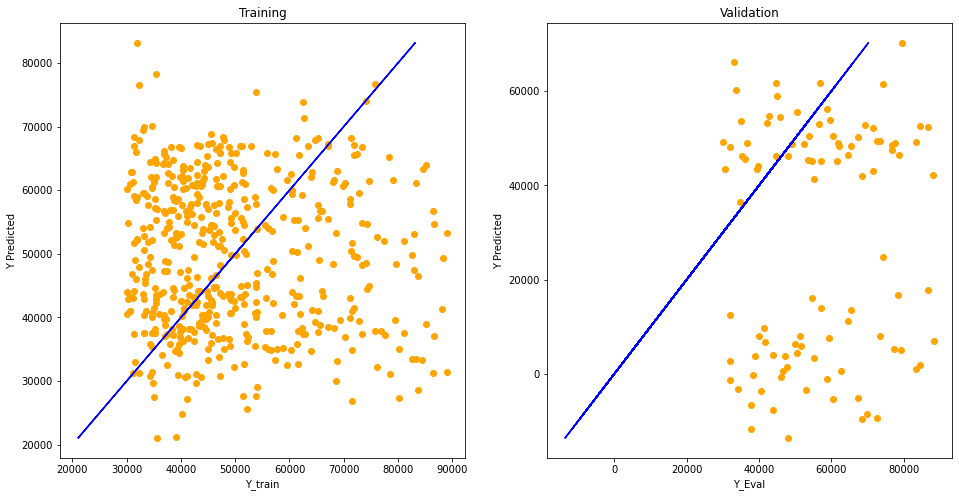

In [313]:
pred_plot(y_train_arr*16000, train_pred_dipls[0]*16000, y_eval_arr*16000, yhat_dipls*16000, 'Cap')

In [314]:
print("Train R2  : %.4f" %r2_train)
print('Train MAPE: %.4f' %mape_train)
print("Valid R2  : %.4f" %r2_valid)
print('Valid MAPE: %.4f' %mape_valid)

Train R2  : -0.7425
Train MAPE: 0.3154
Valid R2  : -4.9871
Valid MAPE: 0.5866


#### Using Heuristic di-PLS

In [316]:
%run di_pls_func_3.py
import di_pls_model_3 as dipls

In [317]:
m_2 = dipls.model(train_arr,y_t,arr_Xs,arr_Xt,15,1000)
m_2.fit(1_000_000)
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = train_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])

In [318]:
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = train_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr*16000, yhat_dipls*16000, y_eval_arr.shape[1])

In [319]:
r2_valid, adj_r2_valid, mape_valid

(0.5250583627895286, 0.5202120195526869, 0.16156965339078444)

In [320]:
train_pred_dipls = m_2.predict(train_arr,rescale = train_arr)

In [321]:
r2_train, adj_r2_train, mape_train = metric_cal(y_t, train_pred_dipls[0], y_t.shape[1])

In [322]:
r2_train, adj_r2_train, mape_train

(0.8308994776531378, 0.830571763462543, 0.10172901144377895)

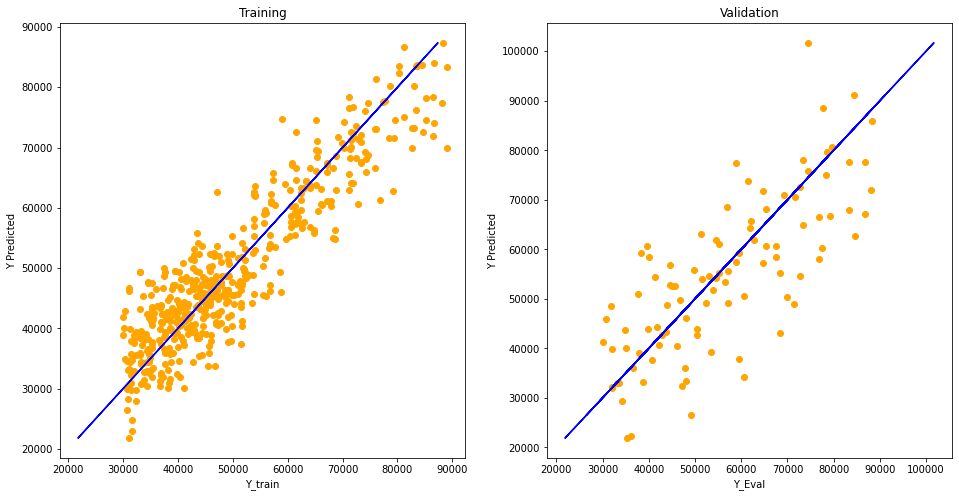

In [323]:
pred_plot(y_train_arr*16000, train_pred_dipls[0]*16000, y_eval_arr*16000, yhat_dipls*16000, 'Cap')

In [324]:
print("Train R2  : %.4f" %r2_train)
print('Train MAPE: %.4f' %mape_train)
print("Valid R2  : %.4f" %r2_valid)
print('Valid MAPE: %.4f' %mape_valid)

Train R2  : 0.8309
Train MAPE: 0.1017
Valid R2  : 0.5251
Valid MAPE: 0.1616
